<center> <span style="color:#0F3460;font-size:30px; font-weight: bold; padding:250px ;">Elevator Predictive Maintenance</span> </center>

<span> <center>Datasets:https://www.kaggle.com/datasets/shivamb/elevator-predictive-maintenance-dataset </center></span>

<center><span style="color:#0F3460;font-size:21px; font-weight: bold;">


<span style="color:#0F3460;font-size:21px; font-weight: bold;">1.1 Importing libaries </span>

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import numpy as np

<hr>

  <center><span style="color:#0F3460;font-size:30px; font-weight: bold;">Part 1</span> </center> <br>
  
  <center><span style="color:#0F3460;font-size:23px; font-weight: bold;">Data Preprocessing</span>  </center>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.2 Importing My Data From *csv* File</span>

In [140]:
epm = pd.read_csv("predictive-maintenance-dataset.csv")

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.3 Top 5 Rows</span>

In [141]:
epm.head()

,ID,revolutions,humidity,vibration
0,1,93.744,73.999,18.0
1,1,93.740,73.999,18.0
2,1,93.736,73.998,18.0
3,1,93.732,73.998,18.0
4,1,93.729,73.998,18.0


- ID: Used for tracking and managing records.
- Revolutions: Key feature for assessing wear and predicting when maintenance is needed based on usage.
- Humidity: Helps in understanding environmental factors affecting machinery performance.
- Vibration: Critical for early detection of mechanical issues, allowing for preventive actions.
- x1 to x5: Enhance the model by providing additional context and potentially capturing complex interactions affecting machinery health.



 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.4 Info</span>

In [142]:
epm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112001 entries, 0 to 112000
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ID           112001 non-null  int64  
 1   revolutions  112001 non-null  float64
 2   humidity     112001 non-null  float64
 3   vibration    109563 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.4 MB


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.5 Cleaning</span>

In [143]:
epm_clean = epm.isnull().sum()
epm_clean

ID                0
revolutions       0
humidity          0
vibration      2438
dtype: int64

In [144]:
epm_clean = epm.dropna()
epm_clean.isnull().sum()

ID             0
revolutions    0
humidity       0
vibration      0
dtype: int64

<hr>

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.6 Statistical Summary </span>


In [145]:
epm_clean.describe()

,ID,revolutions,humidity,vibration
count,109563.000000,109563.000000,109563.000000,109563.000000
mean,934.745169,46.250013,74.216124,28.340276
std,541.556004,19.130226,0.686551,24.292500
min,1.000000,16.933000,72.399000,2.000000
25%,468.000000,28.818000,73.908000,8.000000
50%,936.000000,43.295000,74.207000,21.280000
75%,1407.000000,64.000000,74.717000,39.210000
max,1867.000000,93.744000,75.400000,100.000000


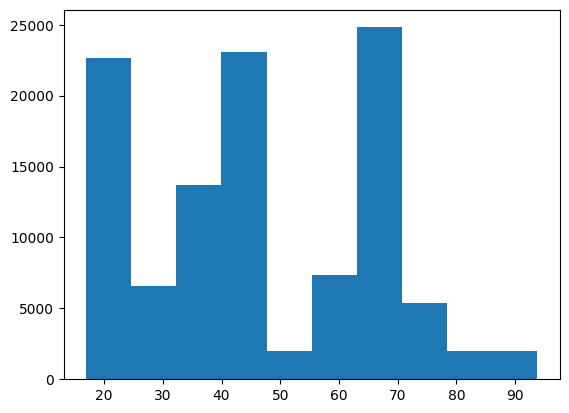

In [146]:
revolutions = epm_clean['revolutions']
plt.hist(revolutions)
plt.show()

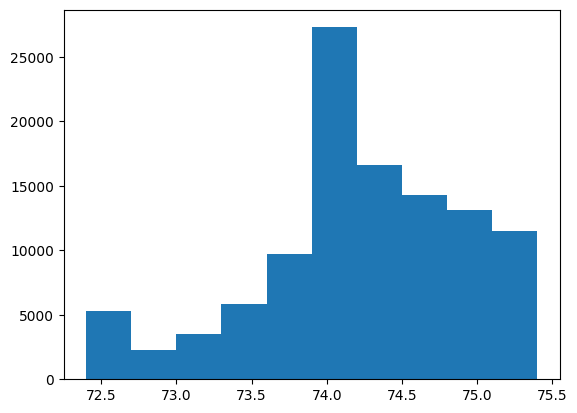

In [147]:
humidity = epm_clean['humidity']
plt.hist(humidity)
plt.show()

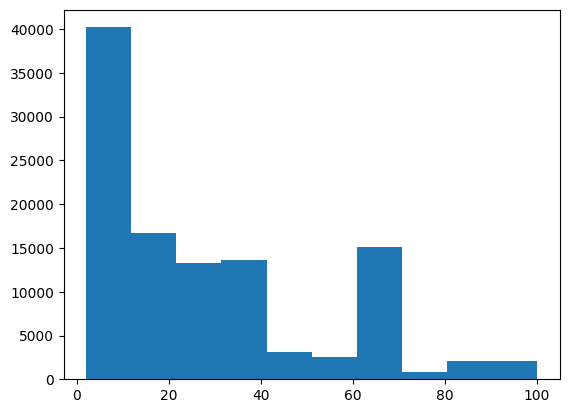

In [148]:
vibration = epm_clean['vibration']
plt.hist(vibration)
plt.show()

 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.7 Relationships between Features</span>


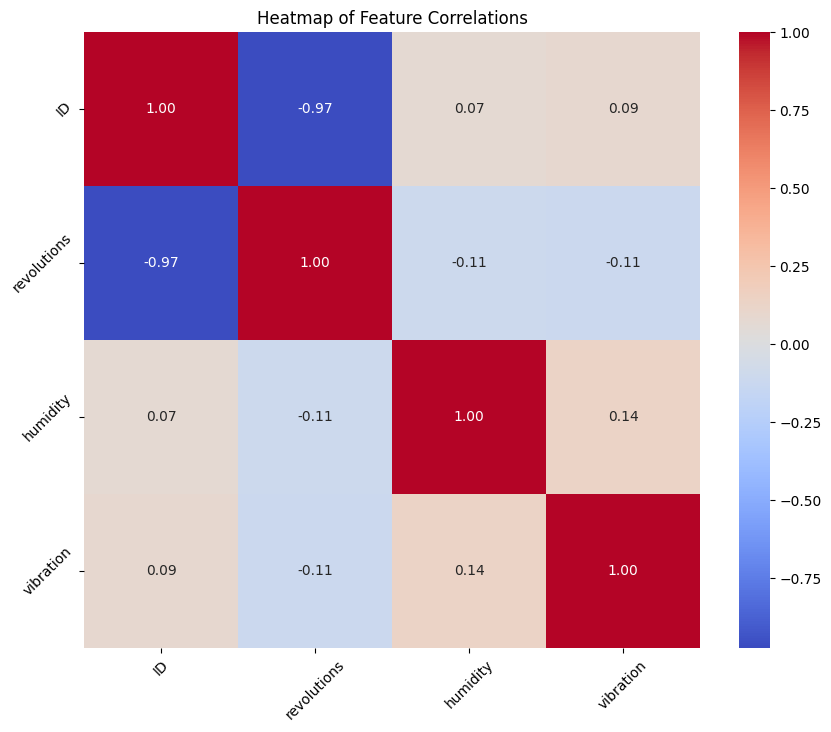

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# emp = pd.read_csv('path_to_your_dataset.csv')

# Calculate the correlation matrix
corr = epm_clean.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjusts the size of the plot
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)

# Customizing the plot
plt.title('Heatmap of Feature Correlations')
plt.xticks(rotation=45)  # Rotates the x-axis labels for better readability
plt.yticks(rotation=45)  # Rotates the y-axis labels for better readability

# Display the plot
plt.show()

X5 and humidity 
X4, x3, x2, x1 and revolution 

Non of the sensors work good with vibration

In [150]:
import pandas as pd

# Read the training data
train_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)

# Print the shape and first few rows
print('Shape of Train dataset: ', train_df.shape)
print(train_df.head())


Shape of Train dataset:  (112001, 4)
   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   1       93.740    73.999       18.0
2   1       93.736    73.998       18.0
3   1       93.732    73.998       18.0
4   1       93.729    73.998       18.0


In [151]:
print(train_df.columns)  # Print column indices

Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [152]:
print(train_df.head())

   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   1       93.740    73.999       18.0
2   1       93.736    73.998       18.0
3   1       93.732    73.998       18.0
4   1       93.729    73.998       18.0


In [153]:
import pandas as pd


# Step 3: Print the shape of the DataFrame to understand its dimensions
print('Initial shape of Train dataset: ', train_df.shape)

# Step 4: Check the actual number of columns
num_columns = train_df.shape[1]
print(f"Number of columns: {num_columns}")

# Step 5: Define column names (ensure the count matches the number of columns)
col_names = ['ID', 'revolutions', 'humidity', 'vibration']

# Ensure the number of column names matches the number of columns in the DataFrame
if len(col_names) == num_columns:
    # Assign column names
    train_df.columns = col_names
else:
    print("Error: The number of column names does not match the number of columns in the DataFrame")
    print(f"Expected {num_columns} column names but got {len(col_names)}.")

# Print the columns to verify
print("Columns of the DataFrame:", train_df.columns)

# Print the shape and head of the Data


Initial shape of Train dataset:  (112001, 4)
Number of columns: 4
Columns of the DataFrame: Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [154]:
# Read the test data
test_df = pd.read_csv("predictive-maintenance-dataset.csv")

# Inspect the test DataFrame
print(test_df.shape) 
print(test_df.head()) 
print(test_df.columns)  


(112001, 4)
   ID  revolutions  humidity  vibration
0   1       93.744    73.999       18.0
1   1       93.740    73.999       18.0
2   1       93.736    73.998       18.0
3   1       93.732    73.998       18.0
4   1       93.729    73.998       18.0
Index(['ID', 'revolutions', 'humidity', 'vibration'], dtype='object')


In [155]:
import pandas as pd

# Step 1: Read the CSV file with the correct delimiter (comma in this case)
truth_df = pd.read_csv('predictive-maintenance-dataset.csv', delimiter=',', header=0)
truth_df.drop(truth_df.columns[[1]], axis=1, inplace=True)
print(truth_df.head())


   ID  humidity  vibration
0   1    73.999       18.0
1   1    73.999       18.0
2   1    73.998       18.0
3   1    73.998       18.0
4   1    73.998       18.0


In [156]:
train_df.sort_values

<bound method DataFrame.sort_values of           ID  revolutions  humidity  vibration
0          1       93.744    73.999      18.00
1          1       93.740    73.999      18.00
2          1       93.736    73.998      18.00
3          1       93.732    73.998      18.00
4          1       93.729    73.998      18.00
...      ...          ...       ...        ...
111996  1867       20.186    73.992       2.00
111997  1867       20.186    73.992      20.01
111998  1867       20.185    73.992      20.01
111999  1867       20.185    73.992      20.00
112000  1867       20.184    73.992       2.00

[112001 rows x 4 columns]>

In [160]:
# sort based on id and cycle
train_df = train_df.sort_values(['ID','revolutions'])
train_df.head()

,ID,revolutions,humidity,vibration
58,1,93.520,73.980,18.06
57,1,93.524,73.980,18.06
56,1,93.528,73.981,18.06
55,1,93.532,73.981,18.06
54,1,93.536,73.981,18.05


<span style="color:#0F3460;font-size:19px; font-weight: bold;">Data Preprocessing </span>

In [161]:
from sklearn import preprocessing
# TRAIN
#######
# Data Labeling - generate column RUL(Remaining Usefull Life or Time to Failure)
rul = pd.DataFrame(train_df.groupby('ID')['revolutions'].max()).reset_index()
rul.columns = ['ID', 'max']
train_df = train_df.merge(rul, on=['ID'], how='left')
train_df['RUL'] = train_df['max'] - train_df['revolutions']
train_df.drop('max', axis=1, inplace=True)
# generate label columns for training data
# we will only make use of "label1" for binary classification,
# while trying to answer the question: is a specific engine going to fail within w1 revolutionss?
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2

# MinMax normalization (from 0 to 1)
train_df['vibration_norm'] = train_df['vibration']
cols_normalize = train_df.columns.difference(['ID','revolutions','humidity','vibration','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
# Fill NaNs
train_df = train_df.fillna(0)

norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]),
                             columns=cols_normalize,
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)

######
# TEST
######
# MinMax normalization (from 0 to 1)
test_df['vibration_norm'] = test_df['vibration']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]),
                            columns=cols_normalize,
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

# Generate column max for test data
rul = pd.DataFrame(test_df.groupby('ID')['vibration'].max()).reset_index()
rul.columns = ['ID', 'max']

# Merge 'rul' with 'test_df'
test_df = test_df.merge(rul, on='ID', how='left')

# Calculate the RUL
test_df['RUL'] = test_df['max'] - test_df['vibration']
test_df.drop('max', axis=1, inplace=True)

# Generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0)
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2

# Reset index if needed
test_df = test_df.reset_index(drop=True)

# Fill NaNs
test_df = test_df.fillna(0)

# Print the first few rows of the updated test_df
print(test_df.head())

   ID  revolutions  humidity  vibration  vibration_norm   RUL  label1  label2
0   1       93.744    73.999       18.0            0.18  0.06       1       2
1   1       93.740    73.999       18.0            0.18  0.06       1       2
2   1       93.736    73.998       18.0            0.18  0.06       1       2
3   1       93.732    73.998       18.0            0.18  0.06       1       2
4   1       93.729    73.998       18.0            0.18  0.06       1       2


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">1.10 Function to reshape dataset as required by LSTM</span>

In [184]:
def gen_sequence(id_df, seq_length, seq_cols):
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    if num_elements < seq_length:
        return []  # Not enough data to generate sequences
    sequences = [data_array[start:start + seq_length, :] for start in range(num_elements - seq_length + 1)]
    return sequences

In [185]:
# Define sequence length and columns to use
feature_columns = ['revolutions', 'humidity', 'vibration']
sequence_length = 50

# Filter IDs with enough data
valid_ids = [id for id in train_df['ID'].unique() if len(train_df[train_df['ID'] == id]) >= sequence_length]

# Generator for the sequences
seq_gen = (gen_sequence(train_df[train_df['ID'] == id], sequence_length, feature_columns) for id in valid_ids)

# Generate sequences and convert to numpy array
all_sequences = []
for sequences in seq_gen:
    all_sequences.extend(sequences)

seq_array = np.array(all_sequences, dtype=np.float32)
seq_array.shape

(20525, 50, 3)

In [186]:
def gen_labels(id_df, seq_length, label_col):
    data_array = id_df[label_col].values
    num_elements = len(data_array)
    labels = [data_array[start + seq_length - 1] for start in range(num_elements - seq_length + 1)]
    return labels

In [187]:
# Generator for labels
label_gen = (gen_labels(train_df[train_df['ID'] == id], sequence_length, ['label1']) for id in valid_ids)

all_labels = []
for labels in label_gen:
    all_labels.extend(labels)

label_array = np.array(all_labels, dtype=np.float32)
label_array.shape

(20525, 1)

In [188]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

# Example dummy data for seq_array and label_array
# Replace these with your actual data



# Feature weights
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]


model = Sequential()  # Define the model
# First LSTM layer
model.add(LSTM(units=64, input_shape=(sequence_length, nb_features), 
    return_sequences=True,
    kernel_regularizer=regularizers.l2(0.01)
))

model.add(Dropout(0.5))
# Plus a 30% dropout rate
model.add(Dropout(0.5))

# Second LSTM layer
model.add(LSTM(
    units=32,  # Adjust the number of units as needed
    return_sequences=False,
    kernel_regularizer=regularizers.l2(0.01) 
))
model.add(Dropout(0.5))


# Dense sigmoid layer
model.add(Dense(units=nb_out, activation='sigmoid'))

# With adam optimizer and a binary crossentropy loss. We will optimize for model accuracy.
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Verify the architecture
print(model.summary())

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    seq_array, 
    label_array,
    epochs=10,
    batch_size=200,
    validation_split=0.1,
    verbose=1,
    callbacks=[early_stopping]
)


/usr/local/python/3.10.13/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_40 (LSTM)                  │ (None, 50, 64)         │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 50, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_41 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,857 (116.63 KB)

 Trainable params: 29,857 (116.63 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/10


93/93 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.9531 - loss: 0.9186 - val_accuracy: 1.0000 - val_loss: 0.2307
Epoch 2/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 1.0000 - loss: 0.1705 - val_accuracy: 1.0000 - val_loss: 0.0579
Epoch 3/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 1.0000 - loss: 0.0462 - val_accuracy: 1.0000 - val_loss: 0.0207
Epoch 4/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 1.0000 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0098
Epoch 5/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step - accuracy: 1.0000 - loss: 0.0091 - val_accuracy: 1.0000 - val_loss: 0.0052
Epoch 6/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 1.0000 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 0.0029
Epoch 7/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 1.0000 - loss: 0.0031 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 8/10
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 1.0000 - loss: 0.0020 - val_accuracy: 1.0000 - val_loss: 0.

<hr>

<span style="color:#0F3460;font-size:19px; font-weight: bold;">Results</span>

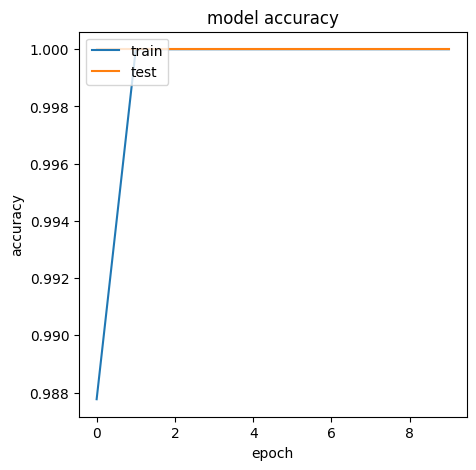

In [189]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

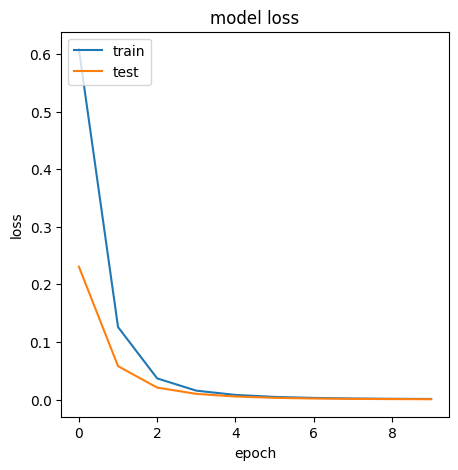

In [190]:
fig_acc = plt.figure(figsize=(5, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [191]:
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_score, recall_score

def print_results(y_test, y_pred):
    # F1 Score
    f1 = f1_score(y_test, y_pred)
    print("F1 Score: ", f1)

    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(12, 6))
    
    plt.subplot(121)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')
    
    # ROC AUC Score
    model_roc_auc = roc_auc_score(y_test, y_pred)
    print("Area under curve: ", model_roc_auc, "\n")
    
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    gmeans = np.sqrt(tpr * (1 - fpr))
    ix = np.argmax(gmeans)
    best_threshold = np.round(thresholds[ix], 3)
    
    plt.subplot(122)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='AUC: %.3f' % model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best Threshold: ' + str(best_threshold))
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    
    plt.tight_layout()
    plt.show()

In [192]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=128)
print('Accurracy of model on training data: {}'.format(scores[1]))

161/161 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 1.0000 - loss: 4.8542e-04
Accurracy of model on training data: 1.0


In [193]:
# make predictions and compute confusion matrix
y_pred_prob = model.predict(seq_array, verbose=1, batch_size=128)

# Convert probabilities to class labels
y_pred = (y_pred_prob > 0.5).astype(int)

# Flatten the predictions to match the shape of y_test
y_pred = y_pred.flatten()

# Assuming y_true is the true labels
y_true = label_array.flatten()

161/161 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step


In [196]:
# Compute and print precision and recall
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
print('Precision: ', precision)
print('Recall: ', recall)

Precision:  1.0
Recall:  1.0


 <span style="color:#0F3460;font-size:19px; font-weight: bold;">Prediction</span>

In [ ]:
import pandas as pd

# Define thresholds for maintenance (example values, adjust based on your epm_clean)
revolutions_threshold = 1000
humidity_threshold = 75
vibration_threshold = 50

# Create the 'maintenance_needed' column based on the criteria
epm_clean['maintenance_needed'] = ((epm_clean['revolutions'] > revolutions_threshold) |
                              (epm_clean['humidity'] > humidity_threshold) |
                              (epm_clean['vibration'] > vibration_threshold)).astype(int)

# Check the new column
print(epm_clean[['revolutions', 'humidity', 'vibration', 'maintenance_needed']].head())

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Features and target variable
X = epm_clean[['revolutions', 'humidity', 'vibration']]
y = epm_clean['maintenance_needed']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

In [ ]:
# New data for prediction
new_data = pd.DataFrame({
    'revolutions': [800, 1200, 950, 1100],
    'humidity': [60, 80, 70, 90],
    'vibration': [40, 60, 45, 55]
})

# Predict maintenance needed
predictions = model.predict(new_data)
print(predictions)  # Output will be an array of 0s and 1s indicating maintenance needed

In [ ]:
import pandas as pd
import numpy as np

# Example data
data = pd.DataFrame({
    'revolutions': [800, 850, 900, 950, 1000, 1050, 1100],
    'humidity': [60, 62, 65, 68, 70, 73, 75],
    'vibration': [40, 42, 44, 46, 48, 50, 52]
})

# Simulate a time index
data['time'] = pd.date_range(start='2024-07-23', periods=len(data), freq='D')
data.set_index('time', inplace=True)

print(data)

In [ ]:
epm_clean['revolutions_smooth'] = epm_clean['revolutions'].rolling(window=2).mean()
epm_clean['humidity_smooth'] = epm_clean['humidity'].rolling(window=2).mean()
epm_clean['vibration_smooth'] = epm_clean['vibration'].rolling(window=2).mean()

print(epm_clean)